# 📊 Dataset: Medical Cost Personal Dataset from Kaggle
##### Link (for reference): https://www.kaggle.com/datasets/mirichoi0218/insurance

### 🧪 1. Load and explore the dataset

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('insurance.csv')

In [2]:
# Check the first few rows
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# View basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
# Check if any null values exist
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### ✅ 2. Create a new column called high_cost
Let’s define it like this:
- If charges > median → high cost (label = 1)
- Else → low cost (label = 0)

In [5]:
# Create a binary classification label
median_charge = df['charges'].median()
df['high_cost'] = (df['charges'] > median_charge).astype(int)

In [6]:
# Confirm it's created
print(df[['charges', 'high_cost']].head(10))

       charges  high_cost
0  16884.92400          1
1   1725.55230          0
2   4449.46200          0
3  21984.47061          1
4   3866.85520          0
5   3756.62160          0
6   8240.58960          0
7   7281.50560          0
8   6406.41070          0
9  28923.13692          1


In [7]:
print(df['high_cost'].value_counts())

high_cost
1    669
0    669
Name: count, dtype: int64


## Preprocessing for Classification

### 🔸 1. Label Encoding (Categorical to Numeric)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create encoder instance
le = LabelEncoder()

# Encode each categorical column
df['sex'] = le.fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])  # yes=1, no=0
df['region'] = le.fit_transform(df['region'])  # northeast=2, northwest=3, southeast=1, southwest=0

# Check encoded columns
print(df.head())

   age  sex     bmi  children  smoker  region      charges  high_cost
0   19    0  27.900         0       1       3  16884.92400          1
1   18    1  33.770         1       0       2   1725.55230          0
2   28    1  33.000         3       0       2   4449.46200          0
3   33    1  22.705         0       0       1  21984.47061          1
4   32    1  28.880         0       0       1   3866.85520          0


### 🔸 2. Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale selected numeric columns
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,high_cost
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400,1
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230,0
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200,0
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061,1
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520,0


### 🔸 3. Splitting the Dataset

Now let’s split the data into training and testing sets.
- Input features (X): All columns except charges and high_cost
- Target (y): high_cost

In [11]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(['charges', 'high_cost'], axis=1)
y = df['high_cost']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1070
Testing samples: 268


**We use stratify=y to keep the same balance of 0s and 1s in both train and test sets.**

# Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# for clean plots
sns.set(style='whitegrid')

### 1. Check Class Balance - high_cost Distribution

In [15]:
import warnings
warnings.filterwarnings('ignore')

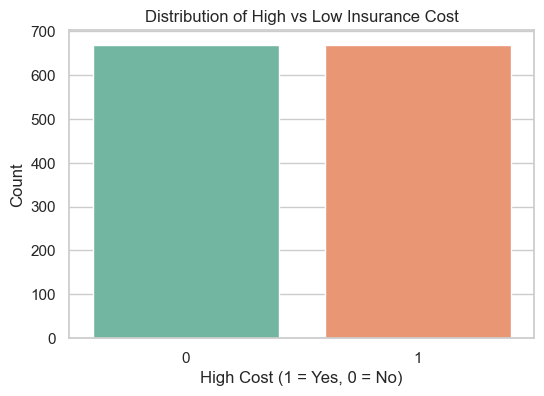

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='high_cost', data=df, palette='Set2')
plt.title('Distribution of High vs Low Insurance Cost')
plt.xlabel('High Cost (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

## 2. Categorical Features - Count Plots

#### Sex :

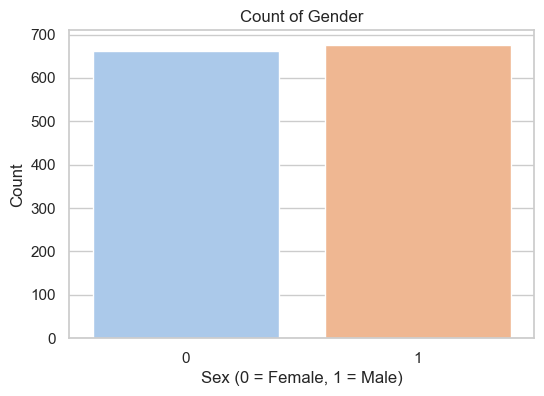

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

#### Smoker :

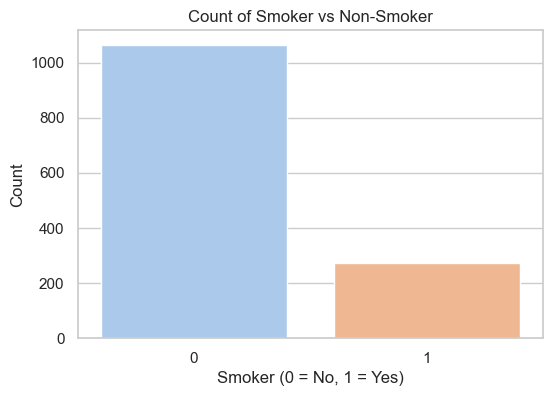

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='pastel')
plt.title('Count of Smoker vs Non-Smoker')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Region :

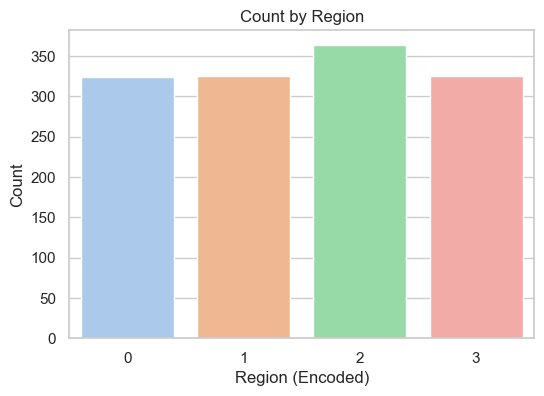

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Count by Region')
plt.xlabel('Region (Encoded)')
plt.ylabel('Count')
plt.show()

## 🔹 3. Numerical Features – Histograms

#### Age :

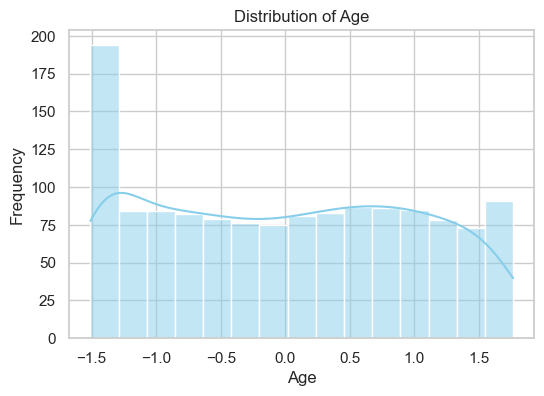

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### BMI :

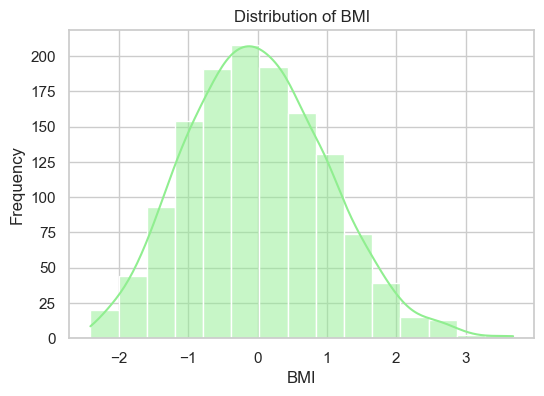

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi'], bins=15, kde=True, color='lightgreen')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

#### Charges :

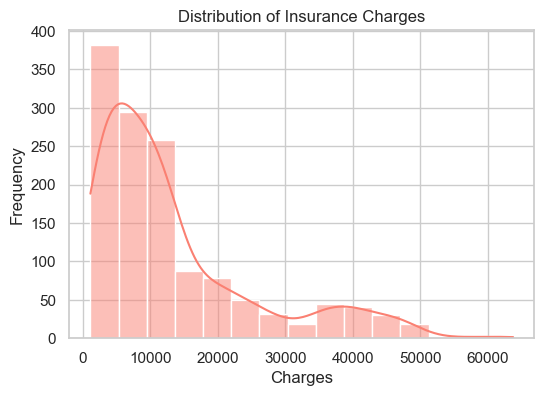

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df['charges'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## 4. Correlation Heatmap

- This help us to identify which features are strongly related to charges or high_cost

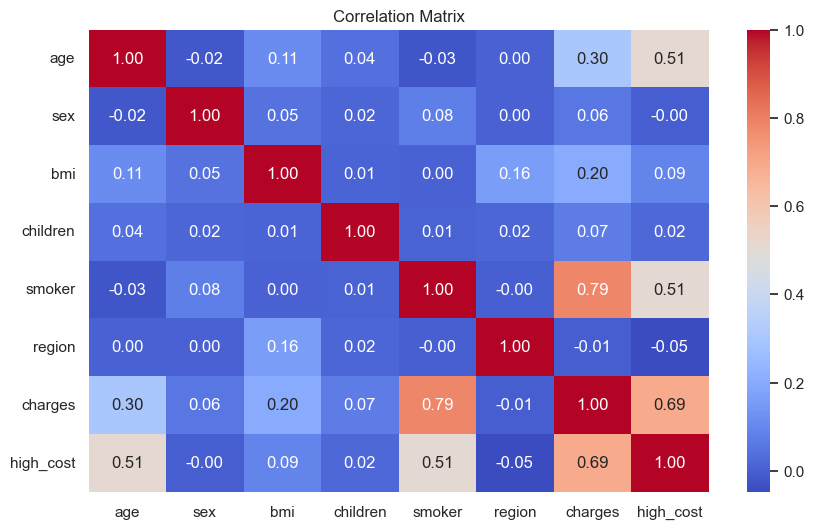

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 🔷 Build & Evaluate a Base Classification Model

🎯 Objective:
Train a Logistic Regression model to predict whether a person’s insurance charge is high or low (high_cost: 1 or 0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 🔹Train the Logistic Regression Model

In [27]:
# Create the model
clf = LogisticRegression(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 🔹 Make Predictions on Test Set

In [28]:
# Predict on the test set
y_pred = clf.predict(X_test)

### 🔹 Evaluate the Model Performance
##### 📏 Use Common Classification Metrics:

In [29]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision
prec = precision_score(y_test, y_pred)

# Recall
rec = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Full Classification Report
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[120  14]
 [ 11 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       134
           1       0.90      0.92      0.91       134

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268

Accuracy: 0.91
Precision: 0.90
Recall: 0.92
F1 Score: 0.91


### 📝 View Probability Predictions

In [30]:
probs = clf.predict_proba(X_test)
print(probs[:5])  # prints the first 5 probability predictions

[[0.03053143 0.96946857]
 [0.90723549 0.09276451]
 [0.55429808 0.44570192]
 [0.18615811 0.81384189]
 [0.67773701 0.32226299]]


# 🔷 Regression Task: Build a Base Regression Model

🎯 Objective:
To build a regression model that predicts the actual insurance charges (charges) based on health and demographic features.

### 🔹 1. Prepare Features and Target

For regression:

🎯 Target (y): charges (continuous variable)

✅ Features (X): All columns except charges and high_cost

In [31]:
# Define X and y for regression
X = df.drop(['charges', 'high_cost'], axis=1)
y = df['charges']

### 🔹 2. Split the Dataset
We’ll use the same 80/20 split strategy:

In [32]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 🔹 3. Train a Base Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

# Create and train the model
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

LinearRegression()

### 🔹 4. Make Predictions

In [34]:
# Predict on test set
y_pred_reg = reg.predict(X_test_reg)

### 🔹 5. Evaluate the Model Performance

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score (coefficient of determination)
r2 = r2_score(y_test_reg, y_pred_reg)

# Print metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4186.51
MSE: 33635210.43
RMSE: 5799.59
R² Score: 0.78


# Conclusion :
This project successfully demonstrates the application of machine learning techniqueson real-world health insurance data for both classification and regression tasks. Themodels built were:
- A Logistic Regression classifier to identify high-cost customers with strong
performance (F1-Score: 91%)
- A Linear Regression model to predict actual charges with good predictive
power (R² Score: 0.78)


### Further improvement can be made by exploring:
- Advanced models like Random Forest or Gradient Boosting
- Hyperparameter tuning with GridSearchCV
- Feature engineering or polynomial features